In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
hf = pd.read_csv('shopping_trends.csv')

In [3]:
hf.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
hf.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
hf['Review Rating'].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

In [62]:
sns.set_style("darkgrid")

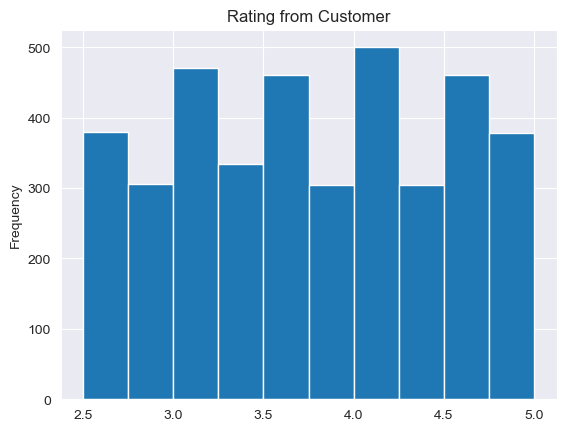

In [64]:
hf['Review Rating'].plot(kind='hist')
plt.title('Rating from Customer');

From the histogram above we can draw information that the lowest rating given by the customer is 2.5 and the highest rating is 5.0. Then, most of the ratings given by customers are in the range 3.5 - 4.0 with a percentage of 24%.

In [43]:
hf['Gender'].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

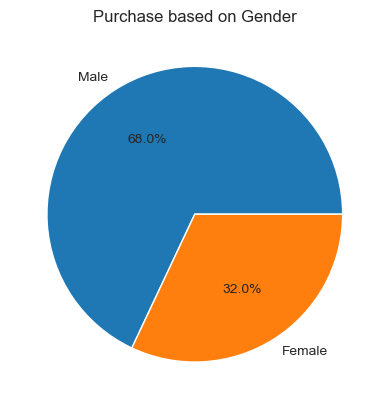

In [44]:
labels = 'Male', 'Female'
Male_Total = hf[(hf['Gender'] == 'Male')].shape[0]
Female_Total = hf[(hf['Gender'] == 'Female')].shape[0]

fig, ax = plt.subplots()
ax.pie ([Male_Total, Female_Total], labels=labels, autopct= '%1.1f%%')
plt.title ('Purchase based on Gender')
plt.show()

Based on the data that has been collected, it is known that there are more male customers than female customers. the number of male customers is 68% from all of the customers while the number of female customers is only 32% of all customers.

In [45]:
hf.groupby('Category')['Category'].agg(['count']).reset_index().sort_values(by='count', ascending= True)

,Category,count
3,Outerwear,324
2,Footwear,599
0,Accessories,1240
1,Clothing,1737


In [46]:
Category_sort = hf.groupby('Category')['Category'].agg(['count']).reset_index().sort_values(by='count', ascending= True)
print(Category_sort)

      Category  count
3    Outerwear    324
2     Footwear    599
0  Accessories   1240
1     Clothing   1737


In [47]:
Category = Category_sort['Category']
Count = Category_sort['count']

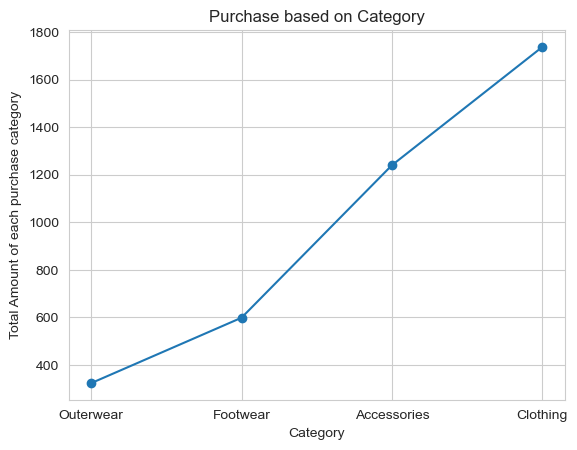

In [48]:
plt.plot(Category, Count, marker = 'o')

plt.xlabel('Category')
plt.ylabel('Total Amount of each purchase category')

plt.title("Purchase based on Category");

Based on the data above, it can conclude that the most purchases category is clothing with amount of 44.5% from all category. And the fewest purchases category is outerwear with amount only 8,3% from all category.

In [49]:
hf['Category'].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

In [50]:
hf['Gender'].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

In [51]:
hf.groupby(['Category', 'Gender'])['Customer ID'].agg(['count'])

count
Category    Gender       
Accessories Female    392
            Male      848
Clothing    Female    556
            Male     1181
Footwear    Female    199
            Male      400
Outerwear   Female    101
            Male      223

In [52]:
# clothing_male
pembelian = 1181
total = 1737

persentase = (pembelian / total) * 100

print("Persentase:", persentase, "%")

Persentase: 67.99078871617732 %


In [53]:
# clothing_female
pembelian = 556
total = 1737

persentase = (pembelian / total) * 100

print("Persentase:", persentase, "%")

Persentase: 32.00921128382268 %


In [59]:
sns.set_style("whitegrid")

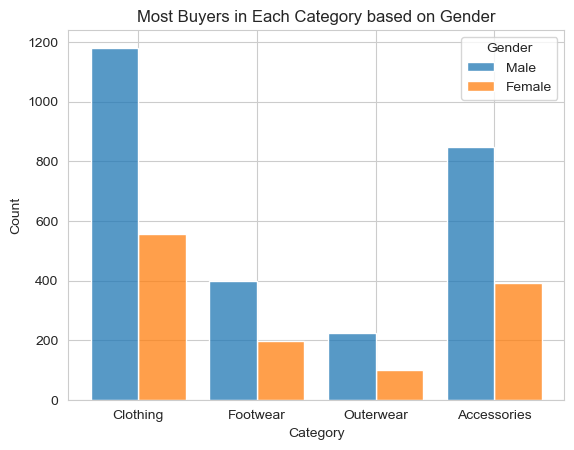

In [61]:
sns.histplot(data=hf, x="Category", hue="Gender", multiple='dodge',shrink=.8)
plt.title('Most Buyers in Each Category based on Gender');

Based on this data, we can draw information that male customers dominate more than female customers in each product category. For example, in the highest purchases, namely in the clothing category, male customers accounted for 68% of purchases, while female customers only accounted for 32% of total purchases in the clothing category. 

In [56]:
hf['Size'].value_counts()

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

In [57]:
sns.set_style("darkgrid")

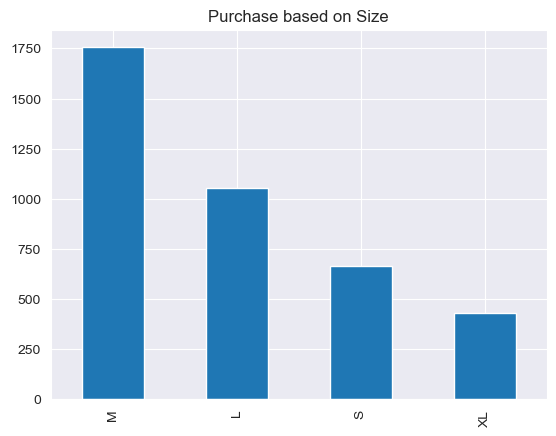

In [58]:
hf['Size'].value_counts().plot(kind= 'bar')
plt.title('Purchase based on Size');

From this data we can see that the size that customers buy the most is size M with a percentage of 45% and the size that customers buy the least is Size XL with a percentage of 11%.